# Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

**Qifan Dai 1034548;
Lirong Zhang 0851601**

In [2]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

In [149]:
from sklearn.model_selection import cross_val_score,train_test_split,ShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression,Ridge,LinearRegression,Lasso
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,SVR
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import random
import numpy as np
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from scipy.stats.distributions import expon
from sklearn.gaussian_process import GaussianProcessRegressor
from IPython.display import clear_output
from openml import runs, tasks


In [115]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = 'e8bb9b0abb1f11aa099be170f147edf7'

## Kernel selection (4 points (1+2+1))
SVMs can be trained with different kernels. Generate a 2-dimensional dataset as shown below and study the effect of the choice of kernel by visualizing the results.

- Train a SVM classifier on the dataset using respectively a linear, polynomial and radial basis function (RBF) kernel, evaluate the performance of each kernel using 10-fold cross-validation and AUC. Which one works best? Visualize the results. Can you intuitively explain why one kernel is more suited than another?
    - Hint: you can use the visualization code used in class. It is under mglearn/plot_svm.py > plot_svm_kernels().
- Take the RBF kernel and vary both the C parameter and the kernel width ($\gamma$). Use 3 values for each (a very small, default, and very large value). For each of the 9 combinations, create the same RBF plot as before, report the number of support vectors, and the AUC performance. Explain the performance results. When are you over/underfitting?
    - Hint: values for C and $\gamma$ are typically in [$2^{-15}..2^{15}$] on a log scale. 
    - Hint: don't count the support vectors manually, retrieve them from the trained SVM.
- Vary C and $\gamma$ again, but this time use a grid of at least 20x20, vary both parameters uniformly on a log scale, and visualise the results using a $C \times \gamma \rightarrow AUC$ heatmap. Explain the performance results, and compare them to the 9 results obtained in the previous subquestion. Can you also tell in which regions of the heatmap you are over/underfitting?
    - Hint: We've constructed such a heatmap in class and in assignment 1.

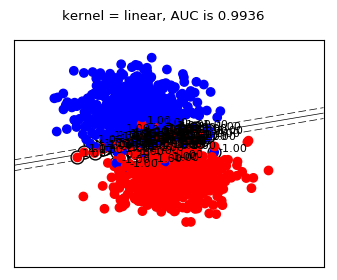

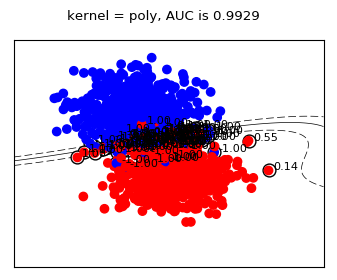

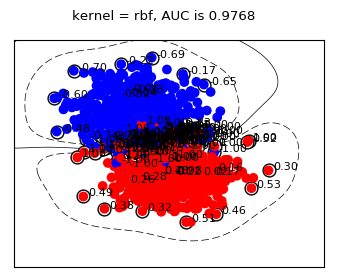

In [117]:
#Exercise 1 question_1


X, y = make_blobs(centers=2, n_samples=1000, random_state=0)
y=y

def plot_svm_kernels():
    # Our dataset and targets

    # figure number
    fignum = 1

    # fit the model
    for kernel in ('linear', 'poly', 'rbf'):
        clf = svm.SVC(kernel=kernel)    #remove the gamma because of the default
        clf.fit(X, y)
        #cores=cross_val_score(clf,X, y, cv=kfold)
        roc_auc=cross_val_score(clf,X,y, scoring="roc_auc",cv=10)
        
        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(4,3))
        plt.suptitle('kernel = %s, AUC is %.4f' % (kernel, roc_auc.mean()))
        

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=85, edgecolors='k', c='w', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr)

        for i, coef in enumerate(clf.dual_coef_[0]):
            plt.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.15,clf.support_vectors_[i, 1]), fontsize=8, zorder=11)

        plt.axis('tight')
        x_min = -3
        x_max = 7
        y_min = -4
        y_max = 8

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
    plt.show()
plot_svm_kernels()

**Answers**: As it can be seen from the plots above, using kernel linear and kernel polynomial produce larger AUC than using kernel rbf. And then boundaries produced by the first two kernels are quite similar which are close to linear, while the boundary produced by using rbf kernel is not linear. The AUC score of using rbf kernel is slighter smaller than the other two, as rbf kernel tends to overfit the dataset here.

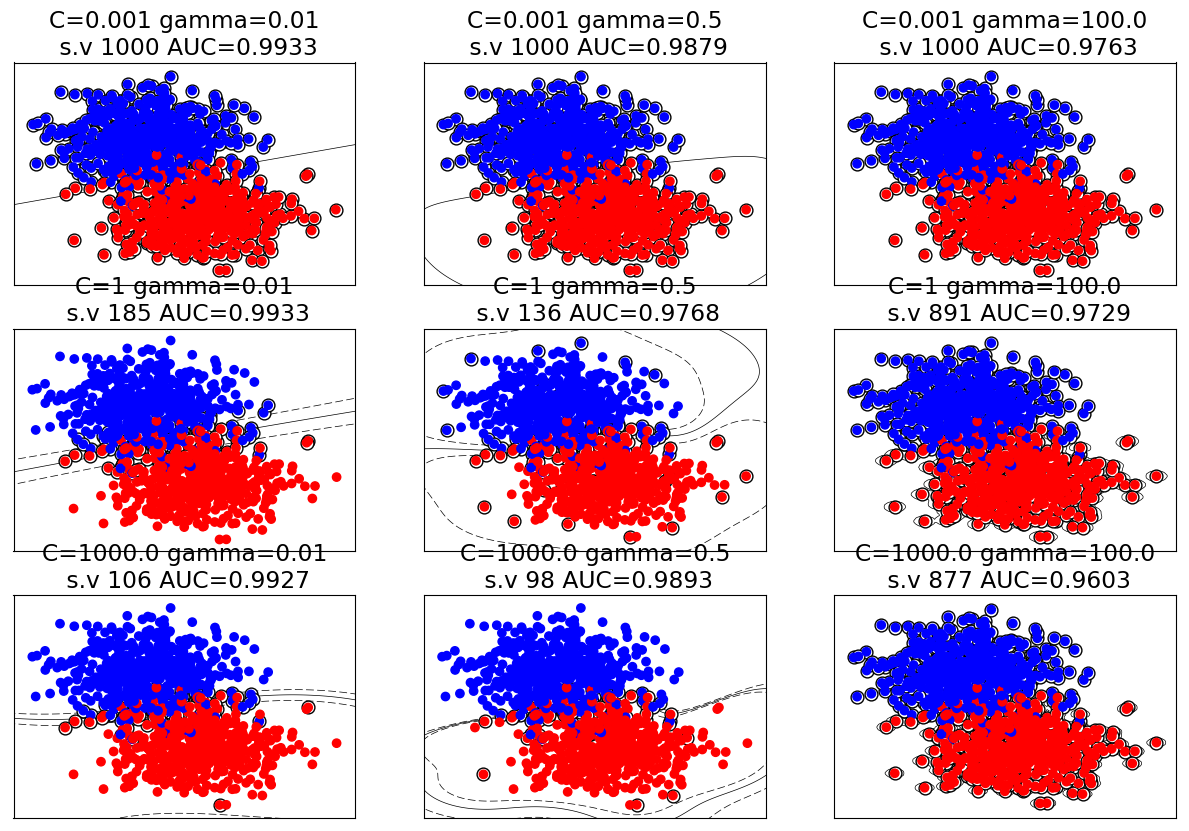

In [118]:
#Exercise 1 question_2, take RBF kernel, take care of the plot logic, still error now
import mglearn 
from sklearn.svm import SVC

def plot_svm_rbf():
    plt.rcParams.update({'font.size': 14})
    plt.figure(num='test',figsize=(15,10 ))
    fignum=0
    for C in [1e-3,1,1e3]:
        for gamma in [1e-2,0.5,1e2]:
        
            clf=SVC(C=C,gamma=gamma,kernel='rbf')
            clf.fit(X,y)
            roc_auc=cross_val_score(clf,X,y, scoring="roc_auc",cv=10)
            fignum +=1
            plt.subplot(3, 3, fignum)
            plt.title('C=%s gamma=%s\n s.v %d AUC=%.4f' % (C,gamma, 
                                                                          clf.support_vectors_.shape[0],roc_auc.mean()))


            plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                        s=85, edgecolors='k', c='w', zorder=10)
            plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr)



            plt.axis('tight')
            x_min = -3
            x_max = 7
            y_min = -4
            y_max = 8
          

            XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
            Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

            # Put the result into a color plot
            Z = Z.reshape(XX.shape)
            plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                        levels=[-.5, 0, .5])


            plt.xticks(())
            plt.yticks(())
#d           
plot_svm_rbf()
    


**Answer**:From the plots above, it can be seen that when gamma becomes very large, the datasets are overfitted (not categrized correctly anymore). The models are more sensitive to the change of parameter 'gamma' instead of the change of parameter 'c'. When gamma is small, the resylting models behave more linearly.

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'gamma': [0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

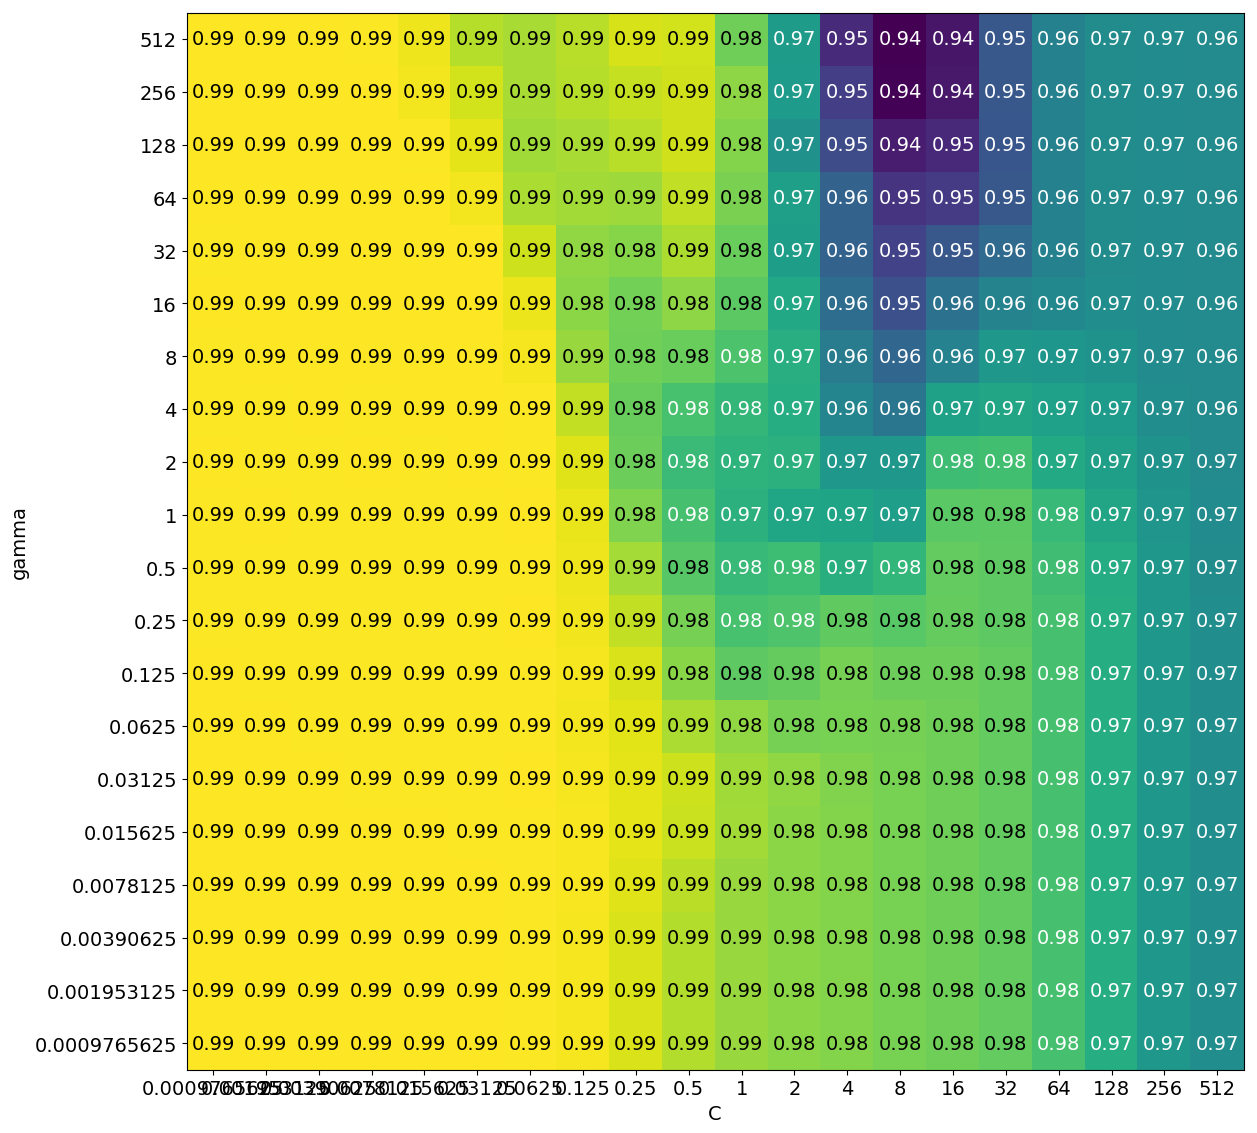

In [119]:
#Exercise 1 Question 3

C_range=[2**x for x in range(-10,10)]
gamma_range=[2**x for x in range(-10,10)]
param_grid={'C':C_range, 'gamma':gamma_range}
grid_search=GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid,n_jobs=1,scoring="roc_auc")
grid_search.fit(X,y)
results=pd.DataFrame(grid_search.cv_results_)
scores=np.array(results.mean_test_score).reshape(len(param_grid['C']),len(param_grid['gamma']))
fig, ax=plt.subplots(figsize=(14,14))
#visualize the result 
figure=mglearn.tools.heatmap(scores, xlabel='C', xticklabels=param_grid['C'],
                      ylabel='gamma', yticklabels=param_grid['gamma'], cmap="viridis",)



**Answer**: It can be seen that at the right up region when the value of 'gamma' is large, the heatmap has blue-greenish color. In this region, it shows high overfitting.

## Robots and SVMs (4 points (2+1+1))

The [Wall Robot Navigation dataset](http://www.openml.org/d/1497) contains about 5500 readings of an ultrasound sensor array mounted on a robot, and your task is to finetune and train an SVM classifier to predict how the robot should move next.

- Make a stratified 80-20 split of the data. On the training set alone, optimize the main hyperparameters of the SVM for Accuracy with a random search. Vary at least the main kernel types (linear, polynomial, and RBF), the C parameter, the $\gamma$ parameter for the RBF kernel and the exponent/degree for the polynomial kernel. Report the optimal hyperparameter settings and Accuracy performance. 
    - The degree of the polynonial is typically in the range 2..10.
    - Hint: note that the hyperparameter ranges depend on each other. For instance, $\gamma$ only makes sense if you have selected the RBF kernel as well. We've seen in class how to define multiple hyperparameter spaces in a random/grid search.
- Use a 5x3-fold (5 outer, 3 inner) nested cross-validation (CV) on the training set to obtain a clean evaluation. Evaluate your optimized hyperparameter settings on the separate test set and discuss the result. Is the performance on the independent test set comparable with the result of the random search?
    - Hint: for the nested resampling, use at least a 10-fold CV for the outer loop. The inner loop can be a 3-fold CV or a simple holdout.
- Train an SVM using the optimal hyperparameter configuration you found and test it on the held out (20%) test set. Compare this Accuracy result with the (mean) result of the nested CV. If you would build this robot in practice, how would you find the hyperparameters to use, and which performance would you expect? Is it truly necessary to tune the hyperparameters? Which hyperparameters were most important to tune?

In [167]:
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute); 
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
from IPython.display import clear_output
X, y = robot_data.get_data(target=robot_data.default_target_attribute); 
X_train, X_test,y_train,y_test=train_test_split(X,y,train_size=0.8, stratify=y, random_state=0)
param_grids = [
        {'kernel': ['linear'], 'C': expon(scale=100)},
        {'kernel': ['poly'], 'C': expon(scale=100), 'degree':[x for x in range(2,11)]},
        {'kernel': ['rbf'], 'C': expon(scale=100), 'gamma': expon(scale=0.1)},
    ]
random_search_linear=RandomizedSearchCV(svm.SVC(),param_distributions=param_grids[0],
                                       n_iter=20,n_jobs=-1)
random_search_linear.fit(X_train,y_train)
random_search_poly=RandomizedSearchCV(svm.SVC(),param_distributions=param_grids[1],
                                       n_iter=20,n_jobs=-1)
random_search_poly.fit(X_train,y_train)
random_search_rbf=RandomizedSearchCV(svm.SVC(),param_distributions=param_grids[2],
                                       n_iter=20,n_jobs=-1)
random_search_rbf.fit(X_train,y_train)
clear_output()
print("Best parameters for linear",random_search_linear.best_params_)
print("Best parameters for poly",random_search_poly.best_params_)
print("Best parameters for rbf",random_search_rbf.best_params_)

print ("Best score for linear: {:.4f}" .format (random_search_linear.best_score_))
print ("Best score for poly: {:.4f}" .format (random_search_poly.best_score_))
print ("Best score for rbf: {:.4f}" .format (random_search_rbf.best_score_))

Best parameters for linear {'C': 360.37304034661702, 'kernel': 'linear'}
Best parameters for poly {'C': 188.32217958379948, 'degree': 3, 'kernel': 'poly'}
Best parameters for rbf {'C': 57.693562208516369, 'gamma': 0.0083870346592767927, 'kernel': 'rbf'}
Best score for linear: 0.7342
Best score for poly: 0.8980
Best score for rbf: 0.9161


In [168]:
#Doing the 5*3 fold
clf_inner=RandomizedSearchCV(svm.SVC(),param_distributions=param_grids[2],cv=3,n_jobs=-1)
clf_inner.fit(X,y)
clf_outer=cross_val_score(clf_inner,X,y,cv=5,n_jobs=-1)
score=np.mean(clf_outer)
clear_output()
print("Accuracy on training set:{:.3f} with parameters {}".format(random_search_rbf.best_score_,
                                                                  random_search_rbf.best_params_))
print("The mean optimized performance of this nested cross-validation is:{:.4f}".format(score))

Accuracy on training set:0.916 with parameters {'C': 57.693562208516369, 'gamma': 0.0083870346592767927, 'kernel': 'rbf'}
The mean optimized performance of this nested cross-validation is:0.8681


**Answer**: The mean optimized performance has lower score than that of the optimzed result of the random search of the previous question.

In [169]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)
scores=cross_val_score(RandomizedSearchCV(svm.SVC(),param_distributions=param_grids[2],cv=3),X,y, cv=5)
print("Mean cross-validations scores:{:.4f}".format(scores.mean()))  # cross-validation is accuracy
test_accuracy=random_search_rbf.score(X_test,y_test)
print("The accuracy on the held out(20%) test set is:{:.4f}".format(test_accuracy))

Mean cross-validations scores:0.8721
The accuracy on the held out(20%) test set is:0.9277


**Answer**: The mean  cross-validation score is slightly than the accuracy on the held out(20%) test set. Build this robot in practive, by tuning the hyperparameters, th sensitivities of the sensors on the robot can be tuned. However, it is not always necessary to tune the hyperparameters, if the tuning does not make large differences, then the performance cannot be improved largely.

## A benchmark study (3 points (2+1))

A benchmark study is an experiment in which multiple algorithms are evaluated on multiple datasets. The end goal is to study whether one algorithm is generally better than the others. Meaningful benchmark studies can grow quite complex, here we do a simplified variant.

* Download OpenML datasets 37, 42, 188, 470, and 1464. They are sufficiently large (e.g., at least 500 data points) so that the performance estimation is trustworthy. Select at least three classifiers that we discussed in class, e.g. kNN, Logistic Regression, Random Forests, Gradient Boosting, SVMs, Naive Bayes. Note that some of these algorithms take longer to train. Evaluate all classifiers (with default parameter settings) on all datasets, using a 10-fold CV and AUC. Show the results in a table and interpret them. Which is the best algorithm in this benchmark?
    * Note that these datasets have categorical features, different scales, missing values, and (likely) irrelevant features. You'll need to build pipelines to correctly build all models.
    * Hint: You can either compare the performances directly, or (better) use a statistical significance test, e.g. a pairwise t-test or (better) Wilcoxon signed ranks test, to see whether the performance differences are significant. This is covered in statistics courses. You can then count wins, ties and losses.
* Repeat the benchmark, but now additionally optimize the main hyperparameters of each algorithm in a grid or random search (explore at least 5 values per hyperparameter, where possible). Does this affect the ranking of the algorithms?

In [238]:
#Exercise3 question 1:
data_1 = oml.datasets.get_dataset(37);
data_2 = oml.datasets.get_dataset(470);
data_3 = oml.datasets.get_dataset(1120);
data_4 = oml.datasets.get_dataset(1471);
data_5 = oml.datasets.get_dataset(1464);


rf_cv,logreg_cv,knn_cv,gnb_cv,svm_cv=[],[],[],[],[]
a=[data_1,data_2,data_3,data_4,data_5]


for i in range(0,5):
    
    X,y=a[i].get_data(target=a[i].default_target_attribute)

    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
       
    #Randomforstclassifier
    estimators = [('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('rf', RandomForestClassifier())]
    pipe = Pipeline(estimators)
    pipe=pipe.fit(X_train,y_train)
    #10-fold CV
    acc =cross_val_score(pipe,X_test,y_test, scoring='roc_auc');
    rf_cv.append(np.mean(acc))

    
    
    estimators = [('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()),
                  ('logreg', LogisticRegression())]
    pipe = Pipeline(estimators)
    pipe=pipe.fit(X_train,y_train)
    acc = cross_val_score(pipe,X_test,y_test, scoring='roc_auc');
    logreg_cv.append(np.mean(acc))
    
    estimators = [('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()),
                  ('knn', neighbors.KNeighborsClassifier())]
    pipe = Pipeline(estimators)
    pipe=pipe.fit(X_train,y_train)
    acc = cross_val_score(pipe,X_test,y_test, scoring='roc_auc');
    knn_cv.append(np.mean(acc))
   
    estimators = [('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('svm', SVC(probability=True))]
    pipe = Pipeline(estimators)
    pipe=pipe.fit(X_train,y_train)
    acc = cross_val_score(pipe,X_test,y_test, scoring='roc_auc');
    svm_cv.append(np.mean(acc))
    
    
    estimators = [('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('gnb', GaussianNB())]
    pipe = Pipeline(estimators)
    pipe=pipe.fit(X_train,y_train)
    acc = cross_val_score(pipe,X_test,y_test, scoring='roc_auc');
    gnb_cv.append(np.mean(acc))
   

,datasets 37,datasets 470,datasets 1120,datasets 1471,datasets 1464
gnb-cv,0.82,0.64,0.80,0.69,0.51
knn-cv,0.79,0.55,0.85,0.96,0.44
logreg-cv,0.85,0.61,0.84,0.67,0.62
rf-cv,0.77,0.56,0.89,0.91,0.71
svm-cv,0.85,0.62,0.84,0.67,0.48


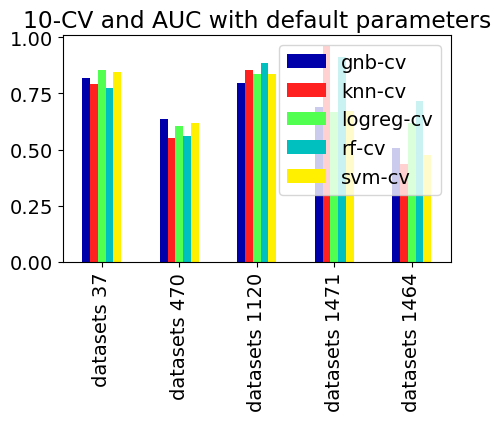

In [239]:
data={'rf-cv':rf_cv,'logreg-cv':logreg_cv,
      'knn-cv':knn_cv,'gnb-cv':gnb_cv,'svm-cv':svm_cv}
index= ['datasets 37', 'datasets 470', 
        'datasets 1120', 'datasets 1471', 'datasets 1464']

df=pd.DataFrame(data,index=index);
df.transpose()
df.plot(kind='bar')
plt.title('10-CV and AUC with default parameters')

 In datasets 37, logreg method works best. For detaset 470, gnb  performs best. For dataset 1120 and 1464, rf has best performance. For dataset 1471, knn reaches best score.  

In [240]:
#Exercise 3 , question (2):
rf_cv,logreg_cv,knn_cv,gnb_cv,svm_cv=[],[],[],[],[]
rf_auc,logreg_auc,knn_auc,gnb_auc,svm_auc=[],[],[],[],[]

for i in range(0,5):
    
    X,y=a[i].get_data(target=a[i].default_target_attribute)

    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
       
    #Randomforstclassifier
    pipe = Pipeline([('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('rf', RandomForestClassifier())])
    estimator=GridSearchCV(pipe,dict(
        rf__n_estimators = [1, 5, 10, 15, 20, 25]))
    es=estimator.fit(X,y)
    model=es.best_estimator_
    #10-fold CV and AUC
    acc=cross_val_score(model,X_test,y_test, scoring='roc_auc');
    rf_cv.append(np.mean(acc))
    
    
    pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                     ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()),
                  ('logreg', LogisticRegression())])
    estimator=GridSearchCV(pipe,dict(
        logreg__C = [0.001, 0.01, 0.1, 1, 10, 100]))
    es=estimator.fit(X,y)
    model=es.best_estimator_
    acc = cross_val_score(model,X_test,y_test, scoring='roc_auc');
    logreg_cv.append(np.mean(acc))
    
    pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                     ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()),
                  ('knn', neighbors.KNeighborsClassifier())])
    estimator=GridSearchCV(pipe,dict(
        knn__n_neighbors = [1,3,5,7,9,11]))
    es=estimator.fit(X,y)
    model=es.best_estimator_
    acc = cross_val_score(model, X_test,y_test, cv=10, n_jobs=-1,scoring='roc_auc')
    knn_cv.append(np.mean(acc))
    
    pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                     ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('svm', SVC(probability=True))])
    estimator=GridSearchCV(pipe,dict(svm__gamma=[0.001, 0.01, 0.1, 1, 10, 100],
                         svm__C = [0.001, 0.01, 0.1, 1, 10, 100]))
    es=estimator.fit(X,y)
    model=es.best_estimator_
    acc = cross_val_score(model, X_test,y_test, cv=10, n_jobs=-1,scoring='roc_auc')
    svm_cv.append(np.mean(acc))

    
    
    pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                  ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('gnb', GaussianNB())])
    estimator=GridSearchCV(pipe,dict(
        gnb__priors=[[0.1,0.9],[0.2,0.8],[0.3,0.7],[0.4,0.6],[0.6,0.4]]))
    es=estimator.fit(X,y)
    model=es.best_estimator_
    acc = cross_val_score(model, X_test,y_test, cv=10, n_jobs=-1,scoring='roc_auc')
    gnb_cv.append(np.mean(acc))

    

,datasets 37,datasets 470,datasets 1120,datasets 1471,datasets 1464
gnb-cv,0.82,0.64,0.80,0.69,0.50
knn-cv,0.83,0.55,0.87,0.91,0.63
logreg-cv,0.85,0.60,0.84,0.52,0.45
rf-cv,0.78,0.54,0.90,0.72,0.76
svm-cv,0.87,0.53,0.91,0.66,0.49


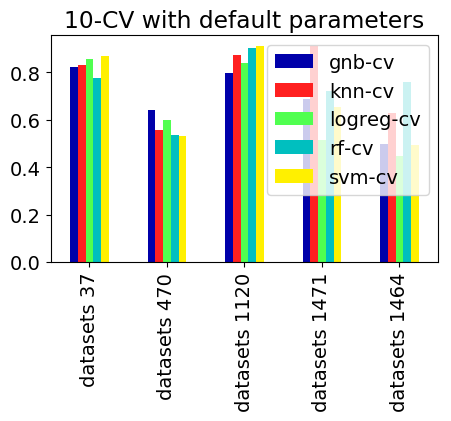

In [241]:
data={'rf-cv':rf_cv,'logreg-cv':logreg_cv,
      'knn-cv':knn_cv,'gnb-cv':gnb_cv,'svm-cv':svm_cv}
index= ['datasets 37', 'datasets 470', 
        'datasets 1120', 'datasets 1471', 'datasets 1464']

df=pd.DataFrame(data,index=index);
df.transpose()
df.plot(kind='bar')
plt.title('10-CV with default parameters')

    

For dataset 37 and 1120, svm method performs best. In the dataset 470, gnb works best. Rf method and knn method reaches highest score in the dataset 1464 and 1471 respectively. Compared to non-optimized algorithms, optimized algorithms effect the ranking of the algorithms in the dataset 37,470 and 1120.

## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

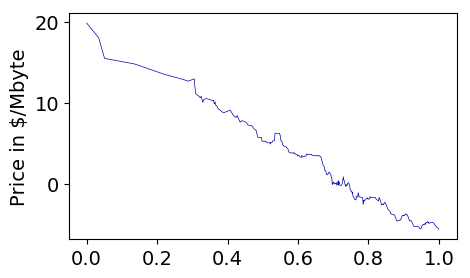

In [219]:
ram_prices = pd.read_csv('data/ram_price.csv')
X=np.array(ram_prices.date).reshape((len(ram_prices),1))
scaler = MinMaxScaler().fit(X)
X_scaled=scaler.transform(X)
y_scaled=np.log(ram_prices.price)
plt.plot(X_scaled, y_scaled)
plt.ylabel("Price in $/Mbyte");

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor,SVR
0,0.82,-4.39,-4.64,-66.59


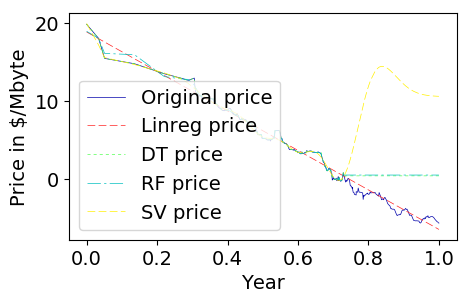

In [221]:

X=np.array(ram_prices.date).reshape((len(ram_prices),1))


#Split train and test sets

y_scaled=np.log(ram_prices.price)
X_train=X[X <= 2000]

X_train, X_test = np.split(X,[len(X_train)])
y_train, y_test = np.split(y_scaled,[len(X_train)])
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)


lr =linear_model.LinearRegression().fit(X_train,y_train)
lrpred=lr.predict(X_scaled)
lr_score=r2_score(y_test,lr.predict(X_test))




param={'max_depth':[2,4,8,16,32]}
dctr=GridSearchCV(DecisionTreeRegressor(),
                        cv=10, n_jobs=-1,
                         param_grid=param
                       ).fit(X_train, y_train)
dc=dctr.best_estimator_
dcpred=dc.predict(X_scaled)
dc_score=r2_score(y_test,dc.predict(X_test))

param={'n_estimators':[2,4,8,16,32]}
clftr = GridSearchCV(RandomForestRegressor(),
                        cv=10, n_jobs=-1,
                         param_grid=param
                          ).fit(X_train, y_train)
clf=clftr.best_estimator_
clfpred=clf.predict(X_scaled)
clf_score=r2_score(y_test,clf.predict(X_test))

param={'gamma':[0.001, 0.01, 0.1, 1, 10, 100],
       'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svrtr=GridSearchCV(SVR(),
                    cv=10, n_jobs=-1,
                     param_grid=param
                          ).fit(X_train, y_train)
sv=svrtr.best_estimator_
svpred=sv.predict(X_scaled)
sv_score=r2_score(y_test,sv.predict(X_test))





plt.plot(X_scaled, y_scaled, label='Original price')
plt.plot(X_scaled, lrpred,label='Linreg price')
plt.plot(X_scaled, dcpred,label='DT price')
plt.plot(X_scaled, clfpred,label='RF price')
plt.plot(X_scaled, svpred,label='SV price')
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
_=plt.legend()
plt.show;
clear_output();
labels=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor',
        'SVR']
data=[lr_score,dc_score,clf_score,sv_score]
df=pd.DataFrame(data,index=labels)
df.T


According to our results,  the default Liner Regression method gives the best $R^2$ score=0.82 which means $82%$ of the variance in the response variable can be explained by the explanatory variables.

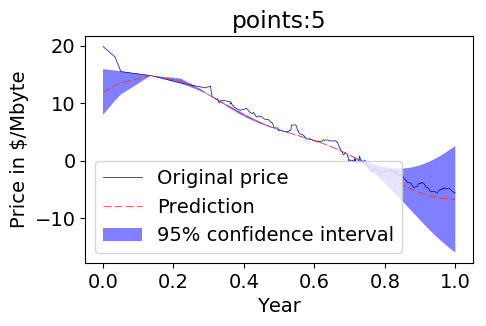

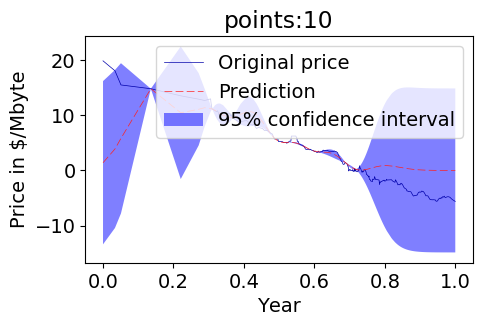

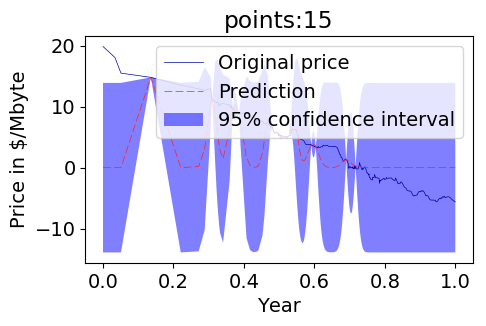

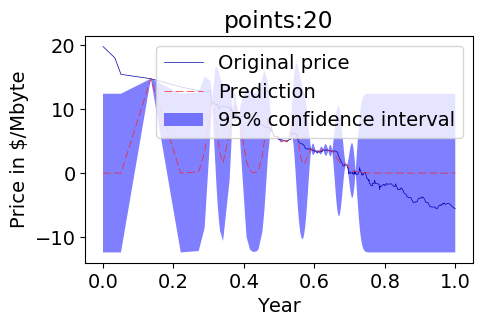

In [231]:
X_train,y_train=[],[]

y=ram_prices.price
y_scaled=np.log(ram_prices.price)
X=ram_prices.date.reshape(-1,1)
x=X[X<=2000]
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))


for j in range(1,5):
    sample=np.random.randint(1,x.shape[0],size=5)
    for i in sample:
        X_train.append(X[i])
        y_train.append(y[i])
        
        
    X_train_scaled= scaler.transform(X_train)
    y_train_scaled=np.log(y_train)
    #X_test_scaled = scaler.transform(X_test)
    gpr =GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9
                                 ).fit(X_train_scaled,y_train_scaled)
    gprpred,sigma=gpr.predict(X_scaled,return_std=True)
    
    plt.figure()
    plt.plot(X_scaled, y_scaled, label='Original price')
    plt.plot(X_scaled, gprpred,label='Prediction')
    plt.fill(np.concatenate([X_scaled, X_scaled[::-1]]),
             np.concatenate([gprpred - 1.9600 * sigma,
                            (gprpred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.title('points:%s' %(5*j))
    #plt.xlabel("Year")
    plt.ylabel("Price in $/Mbyte")
    _=plt.legend(loc='best')
    j=j+1
    

clear_output();    
       
    


R^2 score: -3.371916


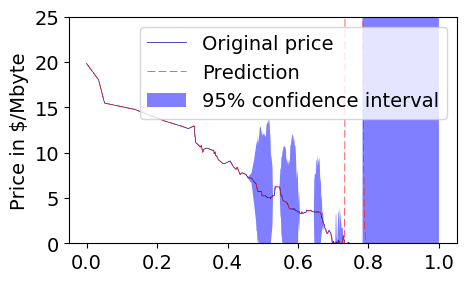

In [232]:
#GaussianProcess on whole data
X=np.array(ram_prices.date).reshape((len(ram_prices),1))


#Split train and test sets
x=X[X <= 2000]
y_scaled=np.log(ram_prices.price)

X_train, X_test = np.split(X,[len(x)])
y_train, y_test = np.split(y_scaled,[len(X_train)])
X_test_scaled = scaler.transform(X_test)
X_train_scaled = scaler.transform(X_train)

gpr =GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=9
                             ).fit(X_train_scaled,y_train)


gprpred,sigma=gpr.predict(X_scaled,return_std=True)


plt.plot(X_scaled, y_scaled, label='Original price')
plt.plot(X_scaled, gprpred,label='Prediction')
plt.fill(np.concatenate([X_scaled, X_scaled[::-1]]),
        np.concatenate([gprpred - 1.9600 * sigma,
                    (gprpred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.ylabel("Price in $/Mbyte")
plt.ylim(0, 25)
_=plt.legend()
plt.show;
clear_output();
print('R^2 score: %f' % r2_score(y_test,gpr.predict(X_test)))


We notice that the $R^2$ score is out of range $(0, 1)$ and hence worse  than Logistic regression. As well we see that the confidence area is way to large for testing data and hence the prediction on the testing data is not reliable. The reason may behind this result is Gaussian process regression is not very suitable for this dataset which leads to wide confidence interval.

## A mini-data mining challenge (2 points (+1))

The goal here is to use everything you have learned to build the best model for a given classification task. The task is hosted on OpenML, so you will receive the train-test splits, and your model will be evaluated on the server. The goal is to reasonably select algorithms and hyperparameter settings to obtain the best model. You can also do model selection and parameter optimization as you have done before. Skeleton code is provided in the OpenML tutorial.

- All details can be found online:
    - The OpenML Task ID is 145677: https://www.openml.org/t/145677
    - The dataset description can be found here: https://www.openml.org/d/4134
- A leaderboard is kept of the best models: https://www.openml.org/t/145677#!people
    - You are able to see the solutions of others (by clicking in the timeline or run list), but resubmission of the exact same solution does not register on the leaderboard.
    - You can share one account (one API key) per team. In case you use two, we take the one that performs best.
- You can document the different experiments that you ran in this notebook. For each experiment, provide a description of how you chose the algorithms and parameters that you submitted. Try to reason about which experiments to try, don't just do an immense random search.
- Points are rewarded as follows:
    - 1 point for the breadth of experiments you ran (algorithms, hyperparameter settings)
    - 1 point for reasoning/insight and interpretation of the results
    - 1 (bonus) point for every team who has uploaded the best solution thus far **on AUC** (who reaches the top of the leaderboard at any moment during the assignment)
        - Note: On the leaderboard page, the 'frontier' line is drawn, and your top ranking is also shown in the table.
        
Note: Report AUC scores in your report as well. In case of issues with OpenML we will use the experiments and scores mentioned your report.

In [171]:
task = oml.tasks.get_task(145677)
data = oml.datasets.get_dataset(task.dataset_id)
X, y = data.get_data(target=data.default_target_attribute)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

This dataset has high dimensions thus we need methods that could deal with high dimension problems very well such as SVM, Logistic Regression. Besides we could also reduce dimensionality so that we could use other classifiers that we learned in the lectures.

In [165]:
#Randomforstclassifier
pipe = Pipeline([('Imp',Imputer(strategy='mean')),('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('rf', RandomForestClassifier())])
estimator=GridSearchCV(pipe,dict(
     rf__n_estimators = [50,200,400,500,700],
     rf__max_features=[0.0001,0.001,0.01,0.1,1,10]),
                       n_jobs=1)
es=estimator.fit(X_train,y_train)
model=es.best_estimator_
#AUC
auc= roc_auc_score(y_test,  model.predict_proba(X_test)[:,1],);
print('auc score:%f' %np.mean(auc))
#print('best model: %s' %model.named_steps['rf'])

auc score:0.764734


According to first assignment, we know that for a better randomforestclassifier, we need small max_features and large n_estimators, thus we choose parameters like these. Compared auc-scores from other classification method, rf classifier reaches the highest score.

In [179]:
pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                     ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()),
                  ('logreg', LogisticRegression())])
estimator=GridSearchCV(pipe,dict(
        logreg__C = [0.001, 0.01, 0.1, 1, 10, 100,1000]),
                       n_jobs=1)
es=estimator.fit(X_train,y_train)
model=es.best_estimator_
auc = cross_val_score(model,X_test,y_test, scoring='roc_auc');
print('auc score:%f' %np.mean(auc))
#print('best model: %s' %model.named_steps['logreg'])

auc score:0.477399
best model: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In the lecture notes, it says that higher C values, fewer misclassfications, thats why we test C from 0.001 to 1000.

In [242]:
    
pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                     ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()),
                  ('knn', neighbors.KNeighborsClassifier())])
estimator=GridSearchCV(pipe,dict(
        knn__n_neighbors = [3,5,7,9,11,13,15],
         knn__leaf_size=[10,20,30,40,50]),n_jobs=1)
es=estimator.fit(X_train,y_train)
model=es.best_estimator_
auc = roc_auc_score(y_test,  model.predict_proba(X_test)[:,1]);
print('auc score:%f' %np.mean(auc))
print('best model: %s' %model.named_steps['knn'])

auc score:0.682851
best model: KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


Since grid search is time demanding we only try 7 possibilities of  the number of neighbors and want to keep them small. We also want to optimize the value leaf_size since the leaf size controls the minimum number of points in a given node and effectivly adjusts the tradeoff between the cost of node traversal. 

In [243]:
pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                     ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('svm', SVC(probability=True))])
estimator=GridSearchCV(pipe,dict(svm__gamma=[0.001, 0.01, 0.1, 1, 10, 100],
                         svm__C = [0.001, 0.01, 0.1, 1, 10, 100]),n_jobs=1)
es=estimator.fit(X_train,y_train)
model=es.best_estimator_
auc= roc_auc_score(y_test,  model.predict_proba(X_test)[:,1]);
print('auc score:%f' %np.mean(auc))
print('best model: %s' %model.named_steps['svm'])

auc score:0.554959
best model: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


We use the lists of possible values for gamma,C parameters that were given in the lectures.

In [244]:
pipe = Pipeline([('Imp',Imputer(strategy='mean')),
                  ('reduce_dim', PCA()),
                  ('scaler', MinMaxScaler()), 
                  ('gnb', GaussianNB())])
estimator=GridSearchCV(pipe,dict(
        gnb__priors=[[0.1,0.9],[0.2,0.8],[0.3,0.7],[0.4,0.6],[0.6,0.4]])
                      ,n_jobs=1)
es=estimator.fit(X_train,y_train)
model=es.best_estimator_
auc = roc_auc_score(y_test,  model.predict_proba(X_test)[:,1]);
print('auc score:%f' %np.mean(auc))
print('best model: %s' %model.named_steps['gnb'])

auc score:0.470386
best model: GaussianNB(priors=[0.6, 0.4])


For GaussianNB, 'priors' is the only parameters so we make a list of possibile prior probabilities of the classes.